## 4. La temperatura d'un habitatge amb calefacció

Considerem ara l'evolució de la temperatura d'un habitatge amb una temperatura ambient variable
$$T_e(t) = \frac{1}{2}(T_\text{max} + T_\text{min}) + \frac{1}{2}(T_\text{max} - T_\text{min})\cos{\omega t} $$

In [10]:
var('T_max, T_min, T_0, k, q, w')
T_e(t) = 0.5*(T_max + T_min) + 0.5*(T_max - T_min)*cos(w*t)

In [11]:
x = function('T')(t)
eq1 = diff(x,t) == q - k*(x - T_e(t))
T(t) = desolve(eq1, x, ivar = t, ics = [0,T_0])

t |--> 1/2*((T_max - T_min)*k^3*cos(t*w)*e^(k*t) + (T_max - T_min)*k^2*w*e^(k*t)*sin(t*w) + 2*(T_0 - T_max)*k^3 - 2*k^2*q + ((2*T_0 - T_max - T_min)*k + ((T_max + T_min)*k + 2*q)*e^(k*t) - 2*q)*w^2 + ((T_max + T_min)*k^3 + 2*k^2*q)*e^(k*t))/(k^3*e^(k*t) + k*w^2*e^(k*t))

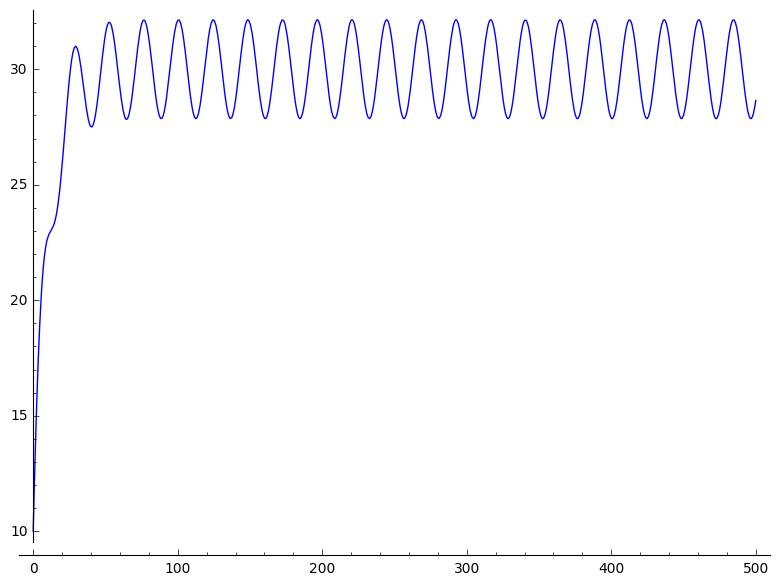

In [19]:
sol = T.subs(T_max = 20, T_min = 8, k = 0.1, q = 1.6, T_0 = 10, w = pi/12)
plot(sol, xmin = 0, xmax = 500)

In [22]:
plots = map(lambda f: plot(f, xmin = 0, xmax = 500), \
    map(lambda x: T.subs(T_max = 20, T_min = 8, k = 0.1, q = 1.6, \
                         T_0 = x, w = pi/12), range(10,51,5)))

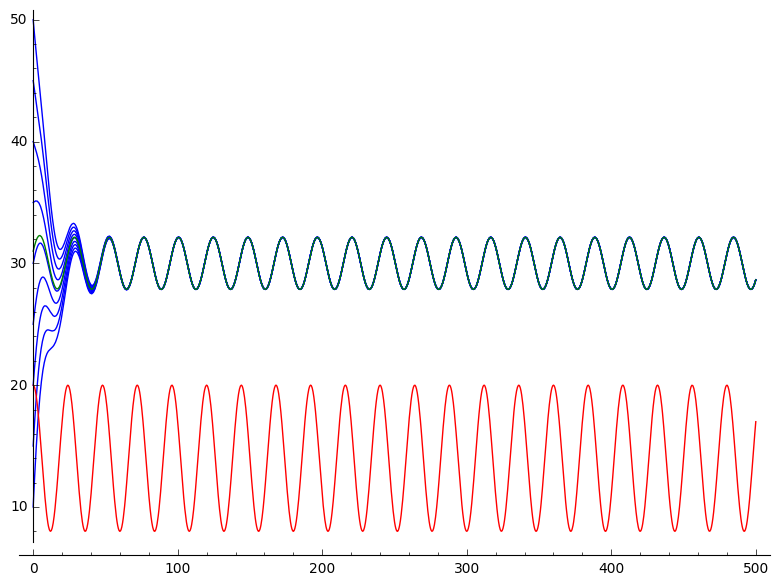

In [27]:
f_per = T.subs(T_max = 20, T_min = 8, k = 0.1, q = 1.6, \
                         T_0 = 31, w = pi/12)
reduce(lambda g, h: g + h, plots) \
+ plot(T_e.subs(T_max = 20, T_min = 8, w = pi/12), \
       xmin = 0, xmax = 500, color = 'red') \
+ plot(f_per, xmin = 0, xmax = 500, color = 'green')